In [65]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [66]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn 
import matplotlib.pyplot as plt
import statsmodels.api as sm

1. Importation of data





In [67]:
tickers = [
    'AIR.PA', 'ATO.PA', 'CS.PA', 'BNP.PA', 'EN.PA', 'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA',
    'DSY.PA', 'ENGI.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'RNO.PA',
    'SAF.PA', 'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STLA.PA', 'TEP.PA', 'HO.PA', 'TTE.PA', 'DG.PA', 'VIV.PA'
]
start_date = '2019-01-01'
end_date = '2022-12-31'

stocks_data = [yf.download(tick, start=start_date, end = end_date) for tick in tickers]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [68]:
stocks_data[0]

Price,Close,High,Low,Open,Volume
Ticker,AIR.PA,AIR.PA,AIR.PA,AIR.PA,AIR.PA
Date,,,,,
2019-01-02,80.184151,80.450890,78.212175,79.622093,1483033
2019-01-03,77.364326,79.784046,73.830013,79.383937,1964509
2019-01-04,81.089172,81.470225,77.669172,78.269343,2006859
2019-01-07,79.603043,82.832510,78.726611,81.889393,1428948
2019-01-08,82.546715,84.413899,79.603037,79.860255,2533915
...,...,...,...,...,...
2022-12-23,109.498177,110.007748,108.714231,109.360986,467239
2022-12-27,110.556511,111.399257,110.046947,110.674106,487884


In [69]:
stocks_data[0]['Close']

Ticker,AIR.PA
Date,
2019-01-02,80.184151
2019-01-03,77.364326
2019-01-04,81.089172
2019-01-07,79.603043
2019-01-08,82.546715
...,...
2022-12-23,109.498177
2022-12-27,110.556511
2022-12-28,109.380585


2. Normalisation of data

In [70]:
for i in range(len(stocks_data)):
    stocks_data[i][('Max', tickers[i])] = np.max(stocks_data[i]['Close'])
    stocks_data[i][('Min', tickers[i])] = np.min(stocks_data[i]['Close'])  
    stocks_data[i][('Normalised', tickers[i])] = (stocks_data[i][('Close', tickers[i])] - stocks_data[i][('Min', tickers[i])])/(stocks_data[i][('Max', tickers[i])] - stocks_data[i][('Min', tickers[i])])
    print(stocks_data[i].head())

Price           Close       High        Low       Open   Volume         Max  \
Ticker         AIR.PA     AIR.PA     AIR.PA     AIR.PA   AIR.PA      AIR.PA   
Date                                                                          
2019-01-02  80.184151  80.450890  78.212175  79.622093  1483033  134.285934   
2019-01-03  77.364326  79.784046  73.830013  79.383937  1964509  134.285934   
2019-01-04  81.089172  81.470225  77.669172  78.269343  2006859  134.285934   
2019-01-07  79.603043  82.832510  78.726611  81.889393  1428948  134.285934   
2019-01-08  82.546715  84.413899  79.603037  79.860255  2533915  134.285934   

Price             Min Normalised  
Ticker         AIR.PA     AIR.PA  
Date                              
2019-01-02  47.400997   0.377317  
2019-01-03  47.400997   0.344862  
2019-01-04  47.400997   0.387733  
2019-01-07  47.400997   0.370629  
2019-01-08  47.400997   0.404509  
Price           Close       High        Low       Open  Volume        Max  \
Ticker    

In [71]:
df = [stocks_data[i][['Close','Min','Max','Normalised']] for i in range(len(stocks_data))]

In [72]:
df[2].head

<bound method NDFrame.head of Price           Close       Min        Max Normalised
Ticker          CS.PA     CS.PA      CS.PA      CS.PA
Date                                                 
2019-01-02  13.350405  9.399975  24.345886   0.264315
2019-01-03  13.239658  9.399975  24.345886   0.256905
2019-01-04  13.655662  9.399975  24.345886   0.284739
2019-01-07  13.594607  9.399975  24.345886   0.280654
2019-01-08  13.645724  9.399975  24.345886   0.284074
...               ...       ...        ...        ...
2022-12-23  23.432695  9.399975  24.345886   0.938900
2022-12-27  23.499187  9.399975  24.345886   0.943349
2022-12-28  23.361767  9.399975  24.345886   0.934155
2022-12-29  23.406096  9.399975  24.345886   0.937121
2022-12-30  23.100222  9.399975  24.345886   0.916655

[1028 rows x 4 columns]>

3. Computation of distances to choose pairs

In [73]:
euclid_dist = np.empty((len(tickers),len(tickers)))
for i in range(len(df)):
    euclid_dist[i,i] = 0
    for j in range(i+1,len(df)):
        euclid_dist[i,j] = np.linalg.norm(df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])])
        euclid_dist[j,i] = euclid_dist[i,j]

In [102]:
euclid_dist2 = []
for i in range(len(stocks_data)):
    for j in range(i+1,len(stocks_data)):
        euclid_dist2.append((tickers[i], tickers[j], stocks_data[i][('Normalised', tickers[i])], stocks_data[j][('Normalised', tickers[j])], np.linalg.norm(df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])])))

euclid_dist2_df = pd.DataFrame(euclid_dist2, columns = ['Ticker1','Ticker2','Series1', 'Series2', 'Euclidean Distance'])

In [103]:
euclid_dist2_df

,Ticker1,Ticker2,Series1,Series2,Euclidean Distance
0,AIR.PA,ATO.PA,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.640600 2019-01-03 0.60...,12.718783
1,AIR.PA,CS.PA,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.264315 2019-01-03 0.25...,6.251241
2,AIR.PA,BNP.PA,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.216865 2019-01-03 0.21...,8.107990
3,AIR.PA,EN.PA,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.321870 2019-01-03 0.30...,6.171223
4,AIR.PA,CAP.PA,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.153036 2019-01-03 0.12...,9.702262
...,...,...,...,...,...
430,HO.PA,DG.PA,Date 2019-01-02 0.552819 2019-01-03 0.52...,Date 2019-01-02 0.235800 2019-01-03 0.23...,8.976275
431,HO.PA,VIV.PA,Date 2019-01-02 0.552819 2019-01-03 0.52...,Date 2019-01-02 0.131352 2019-01-03 0.12...,9.924974
432,TTE.PA,DG.PA,Date 2019-01-02 0.435281 2019-01-03 0.42...,Date 2019-01-02 0.235800 2019-01-03 0.23...,7.399083
433,TTE.PA,VIV.PA,Date 2019-01-02 0.435281 2019-01-03 0.42...,Date 2019-01-02 0.131352 2019-01-03 0.12...,7.857509


4. Computation of basic spreads for each pairs

In [104]:
distances = np.empty((len(tickers),len(tickers)),dtype=object)
for i in range(len(df)):
    distances[i,i] = [0]*len(df[i][('Normalised', tickers[i])])
    for j in range(i+1,len(df)):
        distances[i,j] = df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])]
        distances[j,i] = distances[i,j]

In [123]:
distances2 = []
for i in range(len(df)):
    for j in range(i+1,len(df)):
        distances2.append(df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])])

euclid_dist2_df['Basic Spread'] = distances2

In [170]:
distances[1,2]

Date
2019-01-02    0.376285
2019-01-03    0.344460
2019-01-04    0.342438
2019-01-07    0.338883
2019-01-08    0.356939
                ...   
2022-12-23   -0.913694
2022-12-27   -0.918943
2022-12-28   -0.912068
2022-12-29   -0.911030
2022-12-30   -0.892774
Length: 1028, dtype: float64

<Axes: >

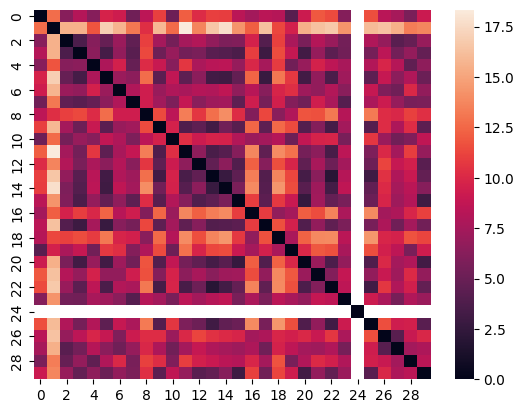

In [171]:
seaborn.heatmap(euclid_dist)

5. We keep the 5 best pairs to construct the portfolio, based on the euclidean distance

In [172]:
euclid_dist_sorted = euclid_dist.flatten()
euclid_dist_sorted = np.sort(euclid_dist_sorted)
sorted_dist = euclid_dist2_df.sort_values(by='Euclidean Distance', ascending=True)

In [173]:
sorted_dist

,Ticker1,Ticker2,Series1,Series2,Euclidean Distance,Basic Spread
307,OR.PA,SU.PA,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005758,Date 2019-01-02 0.005024 2019-01-03 0.00...
334,ML.PA,SGO.PA,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623515,Date 2019-01-02 -0.062941 2019-01-03 -0.07...
146,CAP.PA,RI.PA,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761644,Date 2019-01-02 -0.019576 2019-01-03 -0.02...
299,OR.PA,MC.PA,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790911,Date 2019-01-02 -0.000618 2019-01-03 0.00...
97,BNP.PA,RI.PA,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...
...,...,...,...,...,...,...
420,STLA.PA,TEP.PA,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.016834 2019-01-03 0.00...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...
421,STLA.PA,HO.PA,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.552819 2019-01-03 0.52...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...
422,STLA.PA,TTE.PA,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.435281 2019-01-03 0.42...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...
423,STLA.PA,DG.PA,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.235800 2019-01-03 0.23...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...


In [174]:
Pairs = sorted_dist[:5]

In [176]:
Pairs = Pairs.reset_index(drop=True)

In [177]:
Pairs

,Ticker1,Ticker2,Series1,Series2,Euclidean Distance,Basic Spread
0,OR.PA,SU.PA,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005758,Date 2019-01-02 0.005024 2019-01-03 0.00...
1,ML.PA,SGO.PA,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623515,Date 2019-01-02 -0.062941 2019-01-03 -0.07...
2,CAP.PA,RI.PA,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761644,Date 2019-01-02 -0.019576 2019-01-03 -0.02...
3,OR.PA,MC.PA,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790911,Date 2019-01-02 -0.000618 2019-01-03 0.00...
4,BNP.PA,RI.PA,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...


6. Standard deviation

In [178]:
sorted_dist['STD'] = sorted_dist['Basic Spread'].apply(lambda x: np.std(x))

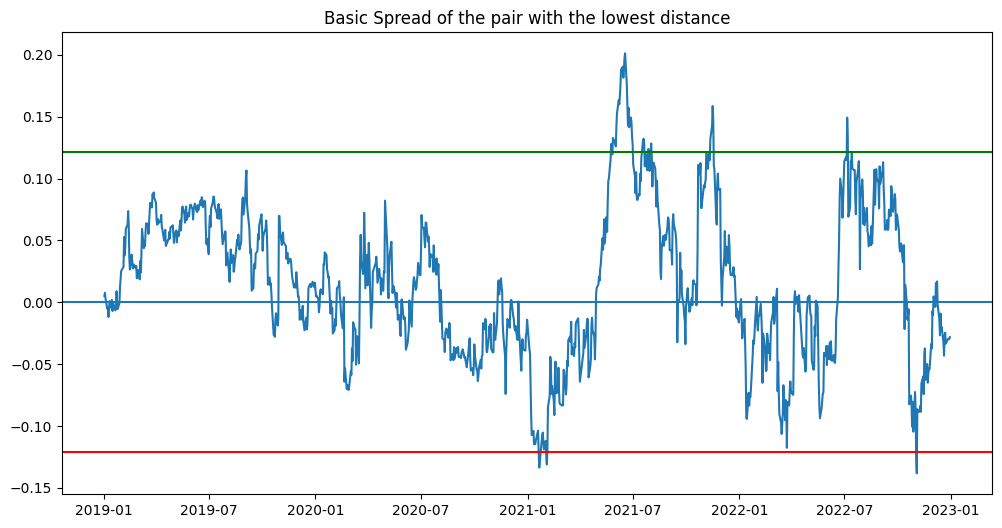

In [180]:
plt.figure(figsize=(12,6))
plt.plot(sorted_dist.iloc[0]['Basic Spread'])
plt.axhline(2*sorted_dist.iloc[0]['STD'], color='green')
plt.axhline(-2*sorted_dist.iloc[0]['STD'], color='red')
plt.axhline(0)
plt.title('Basic Spread of the pair with the lowest distance')
plt.show()

7. Beta Neutral Spread

In [181]:
Pairs.iloc[0]['Ticker2']

'SU.PA'

In [182]:
for i in range(len(Pairs)):
    Y = Pairs.iloc[i]['Series1']
    X = Pairs.iloc[i]['Series2']
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    Ticker2 = Pairs.iloc[i]['Ticker2']
    Pairs.loc[i, 'Beta'] = model.params[('Normalised', Ticker2)]


In [183]:
Pairs

,Ticker1,Ticker2,Series1,Series2,Euclidean Distance,Basic Spread,Beta
0,OR.PA,SU.PA,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005758,Date 2019-01-02 0.005024 2019-01-03 0.00...,0.968036
1,ML.PA,SGO.PA,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623515,Date 2019-01-02 -0.062941 2019-01-03 -0.07...,0.831760
2,CAP.PA,RI.PA,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761644,Date 2019-01-02 -0.019576 2019-01-03 -0.02...,1.044510
3,OR.PA,MC.PA,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790911,Date 2019-01-02 -0.000618 2019-01-03 0.00...,0.851072
4,BNP.PA,RI.PA,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...,0.895558


In [185]:
Pairs['Beta Neutral Spread'] = Pairs['Series1']-Pairs['Beta']*Pairs['Series2']

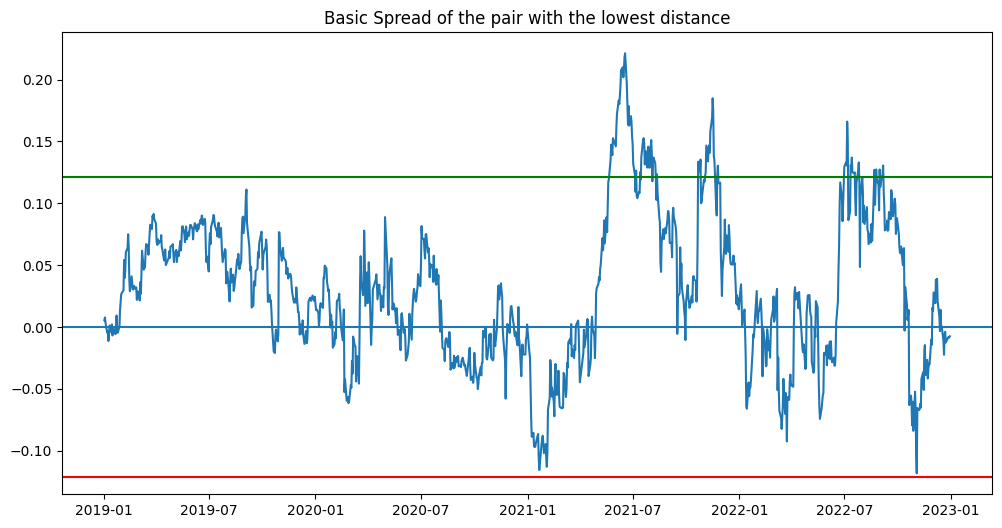

In [187]:
plt.figure(figsize=(12,6))
plt.plot(Pairs.iloc[0]['Beta Neutral Spread'])
plt.axhline(2*sorted_dist.iloc[0]['STD'], color='green')
plt.axhline(-2*sorted_dist.iloc[0]['STD'], color='red')
plt.axhline(0)
plt.title('Basic Spread of the pair with the lowest distance')
plt.show()